### 필요한 라이브러리 가져오기

판다스 버전 : 1.3.4 <br>
BeautifulSoup 버전 : 4.10.0<br>
셀레니움 버전 : 4.10.0 <br>
tqdm 버전 : 4.62.3
이 버전이 아니라면 해당 버전으로 다시 재설치해주세요 <br>

In [1]:
# 라이브러리 버전이 맞지 않을 경우 아래 명령어의 주석을 제거한 후 실행해주세요.
# 이전 예제들을 실행했다면 앞에서 이미 버전을 맞췄습니다.
# !pip install pandas==1.3.4
# !pip install beautifulsoup4==4.10.0

In [2]:
# selenium과 tqdm을 설치하고, 라이브러리 버전을 맞춥니다.
!pip install selenium==4.10.0
!pip install tqdm==4.62.3

In [3]:
# 버전 확인용
import pandas as pd
import selenium
import bs4
import tqdm

print("판다스 버전 :", pd.__version__)
print("BeautifulSoup 버전 :", bs4.__version__)
print("셀레니움 버전 :", selenium.__version__)
print("tqdm 버전 :", tqdm.__version__)

판다스 버전 : 1.3.4
BeautifulSoup 버전 : 4.10.0
셀레니움 버전 : 4.10.0
tqdm 버전 : 4.62.3


In [4]:
import pandas as pd
from tqdm import tqdm_notebook
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys #①
from bs4 import BeautifulSoup
import time

import re
import warnings
warnings.filterwarnings("ignore")

In [5]:
# chromedriver가 설치된 경로 넣기
service = Service(executable_path='C:/Users/it/Downloads/chromedriver-win64/chromedriver.exe') # 독자여러분의 환경에 맞는 경로를 넣어주세요!!!
driver = webdriver.Chrome(service=service)

In [6]:
url = "https://search.shopping.naver.com/search/all?frm=NVSHATC&origQuery=%EB%A9%94%EC%9D%B4%ED%81%AC%EC%97%85%20%EC%BF%A0%EC%85%98&pagingIndex={}&pagingSize=40&productSet=window&query=%EB%A9%94%EC%9D%B4%ED%81%AC%EC%97%85%20%EC%BF%A0%EC%85%98&sort=review&timestamp=&viewType=list"
driver.get(url.format(1)) #②

time.sleep(3)

HTML 수집과 파싱

In [7]:
body = driver.find_element(By.CSS_SELECTOR, 'body')
for down in range(13):
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(0.8)

In [8]:
html=driver.page_source
soup=BeautifulSoup(html, 'lxml')

<html lang="ko"><head><meta content="width=device-width" name="viewport"/><meta charset="utf-8"/><title>메이크업 쿠션 : 네이버 쇼핑</title><link href="https://ssl.pstatic.net/shoppingsearch/static/pc/pc-240325-113538/img/favicon.ico" rel="shortcut icon"/><meta content="메이크업 쿠션 : 네이버 쇼핑" property="og:title"/><meta content="https://ssl.pstatic.net/imgshopping/static/mo2014/icon/og_shopping_v2.png" property="og:image"/><meta content="'메이크업 쿠션'의 네이버쇼핑 검색 결과입니다" property="og:description"/><meta content="7" name="next-head-count"/><link href="https://static.nid.naver.com" rel="preconnect"/><link href="https://lcs.naver.com" rel="preconnect"/><link href="http://shopping.phinf.naver.net" rel="preconnect"/><link href="https://ssl.pstatic.net" rel="preconnect"/><link href="https://shopping-phinf.pstatic.net" rel="preconnect"/><link href="https://volts.shopping.naver.com" rel="preconnect"/><link as="style" href="https://ssl.pstatic.net/shoppingsearch/static/pc/pc-240325-113538/_next/static/css/c66534657f71f
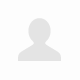
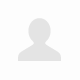

In [9]:
soup

In [10]:
def page_down():
    """페이지 다운키 20번 입력"""
    body = driver.find_element(By.CSS_SELECTOR, 'body')
    for down in range(20):
        body.send_keys(Keys.PAGE_DOWN)
        time.sleep(0.8)

정보 수집 - 개별 제품 URL

In [11]:
days = []
for day in soup.select("span.product_etc__LGVaW"):
    if '등록일' in day.text:
        days.append(day.text)

In [12]:
days[:3]

['등록일 2021.03.', '등록일 2020.11.', '등록일 2022.05.']

In [13]:
url_soup = soup.select('div.product_info_area__xxCTi > div.product_title__Mmw2K > a')

cushion_urls = []
for a in url_soup:
    tmp = a.attrs['href']
    cushion_urls.append(tmp)

print("수집한 제품URL 수 :",len(cushion_urls))
print("첫 번째 URL :\n",cushion_urls[0])

수집한 제품URL 수 : 40
첫 번째 URL :
 https://cr.shopping.naver.com/adcr.nhn?x=HJT%2BLh9321E1zzNPi7m22f%2F%2F%2Fw%3D%3Ds7Snt76BVYT7IOWgYhHiHy1kqUPlUOxxfgNyjIkM4xWKiu8Y6h3GANkaYhqMMJR2lqXJkM7NHbBqclsVZDKfrhezBASmDFzlrDDm5EuAt9oY%2FPo%2BPqJW4rHtX4dO34Et6%2Fv0U4YL5%2B%2Fuq9DCTz8xvyI73cUznZflvIdz3rXT%2Fw7e65Ay6SJjDTo%2Bz479u6vfN4k%2F9%2BON5dKFxoZ4MUgU8B8oQPoPCnuWI4UhEjp7ncwVZUs2C%2FaDIKxJz3fxjiV3EpOr9sPYwajBkeE07IGGkJ5SCPsmGKllbt0kl8XIxCXSZNQUIHIReZBEgWFi5bdANa2h41yhY8jPdusBIbXogVVS3dYvrWwkslrfOMJHgRw8lTCwLTFGNrAEsFDBrlJnhMi3fbHw9Ojya4UHMHloDsib6KMCDgKEhTraWaZabrUdlZvIwuOgjhnlStb6ApCrU87Y3Ut26ZOCeR3sSf0eG5on4JtKb%2BSDXqt8HCzSiXe3ToqnoinHzKUeL88f3xQc591vkDWbgi0%2FZRXV4jgZVl8tnhR47ZEFzh5TnX42sRaw34rbbHJPqHmWoCTEvxmhSJK%2BKSMDWGbL3Ih7P4qYE2jYhYCKekPCDvbTMF%2FwJQpdvp%2BKMzK7AX9vb9w3Qv6HwNz0JZT8SeZKvpk%2FnDyXUlqEpM55QXZVcaycUOiVeMjHHICEQpPL7Rm%2B2fyhjEhHR&nvMid=83015752883&catId=50005288


In [14]:
all_cushion_urls = []
days = []
for i in range(1, 4):
    driver = webdriver.Chrome(service=service)
    driver.get(url.format(i))
    time.sleep(3)

    page_down()

    html=driver.page_source
    soup=BeautifulSoup(html, 'lxml')

    url_soup = soup.select('div.product_info_area__xxCTi > div.product_title__Mmw2K > a')

    cushion_urls = []
    for a in url_soup:
        tmp = a.attrs['href']
        cushion_urls.append(tmp)


    for day in soup.select("span.product_etc__LGVaW"):
        if '등록일' in day.text:
            days.append(day.text)

    all_cushion_urls.extend(cushion_urls)

    driver.close()
    time.sleep(1)

In [15]:
print("수집한 제품 등록일 수 :",len(days))
print("수집한 제품URL 수 :",len(all_cushion_urls))

수집한 제품 등록일 수 : 120
수집한 제품URL 수 : 120


In [16]:
df_url = pd.DataFrame({"url":all_cushion_urls, "sale_date":days})

In [17]:
df_url.to_excel('./쿠션_제품_URL_test.xlsx', index=False)

In [18]:
product_urls = df_url['url'].tolist() #제품URLs
sales_date = df_url['sale_date'].tolist()

정보 수집 - 후기를 제외한 제품 주요 정보

In [19]:
driver = webdriver.Chrome(service=service)

driver.get(product_urls[0]) #①
page_down()

time.sleep(3)

In [20]:
html=driver.page_source
soup=BeautifulSoup(html, 'lxml')

In [21]:
def getHashTags(soup):
    """해시태그를 반환"""
    try:
        elements = []
        for i in range(1, 21):
            xpath = f'//*[@id="REVIEW"]/div/div/div[3]/div[1]/div[2]/div/div/div/div/button[{i}]'
            found_elements = driver.find_elements(By.XPATH, xpath)
            if found_elements:
                elements.extend(found_elements)
        tags = [elements[i].text for i in range(len(elements))]
        return tags
    except:
        return "없음"

def getProductName(soup):
    """제품명을 반환"""
    name = soup.select_one('div._1eddO7u4UC > h3').text #제품명

    return name

def getNumLikes(soup):
    """찜한 수를 반환"""
    try:
        likes = soup.select_one("span._2muLN5Fzlb").text # 찜한 수
        return likes
    except:
        return "없음"

def getNumReviews(soup):
    """리뷰수를 반환"""
    try:
        num_review = soup.select_one('strong._2pgHN-ntx6').text #리뷰수
        return num_review
    except:
        return "없음"

def getNumPhotoReviews(soup):
    """포토리뷰수를 반환"""
    try:
        photo_review = soup.select_one("li:nth-child(1) > a > em").text #포토리뷰수
        return photo_review
    except:
        return "없음"

In [23]:
tags = getHashTags(soup)
name = getProductName(soup)
likes = getNumLikes(soup)
num_review = getNumReviews(soup)
photo_review = getNumPhotoReviews(soup)

product_data = {"name":[name],
                'tag':[tags],
                'likes':[likes],
                "num_review":[num_review],
                "num_photo":[photo_review],
                "url":[product_urls],
                'sale_day':[sales_date[0]]}

product_info_df = pd.DataFrame(data=product_data)

save_name = re.compile("[^가-힣]+").sub("", name)
product_info_df.to_excel('./data/{}_info_test.xlsx'.format(save_name), index=False)

In [24]:
product_info_df

,name,tag,likes,num_review,num_photo,url,sale_day
0,[3/25일 출시] 헤라 NEW 블랙 쿠션 파운데이션 듀오 SPF34/PA++ 15...,"[#만족도, #커버력, #지속력, #가격, #디자인, #품질, #색상, #효과, #...","관심고객수 41,490","78,761","(48,921건)",[https://cr.shopping.naver.com/adcr.nhn?x=8eGx...,등록일 2021.03.


정보 수집 - 후기와 관련 정보 수집

In [25]:
def collectDateReviewScore(soup):
    """전달받은 수프에서 페이지별 날짜, 후기, 점수를 반환한다."""

    # 리뷰 평점 20개
    elements_ratings = []
    for num in range(1, 25):  # 1부터 30까지 숫자를 순회
        xpath_rating = f'//*[@id="REVIEW"]/div/div/div[3]/div[2]/ul/li[{num}]/div/div/div/div[1]/div/div[1]/div[1]/div[2]/div[1]/em'
        elements = driver.find_elements(By.XPATH, xpath_rating)

        # 찾아진 요소들을 all_elements 리스트에 추가
        elements_ratings.extend(elements)

    rev_points = [element.text for element in elements_ratings]


    # 리뷰 작성일 20개
    elements_dates = []
    for num in range(1, 25):  # 1부터 30까지 숫자를 순회
        xpath_date = f'//*[@id="REVIEW"]/div/div/div[3]/div[2]/ul/li[{num}]/div/div/div/div[1]/div/div[1]/div[1]/div[2]/div[2]/span'
        elements = driver.find_elements(By.XPATH, xpath_date)

        # 찾아진 요소들을 all_elements 리스트에 추가
        elements_dates.extend(elements)

    rev_dates = [element.text for element in elements_dates]

    # 리뷰 20개
    elements_rev = []
    for num in range(1, 25):  # 1부터 30까지 숫자를 순회
        xpath_rev = f'//*[@id="REVIEW"]/div/div/div[3]/div[2]/ul/li[{num}]/div/div/div/div[1]/div/div[1]/div[2]/div/span'
        elements = driver.find_elements(By.XPATH, xpath_rev)

        # 찾아진 요소들을 all_elements 리스트에 추가
        elements_rev.extend(elements)

    revs = [element.text for element in elements_rev]
    
    stops = ['한달사용기', "재구매", "BEST"]
    revs = [rev for rev in revs if rev not in stops]

    return rev_points, rev_dates, revs

In [26]:
# 제품 페이지 접속
driver = webdriver.Chrome(service=service)
driver.get(product_urls[0])

# 3초간 정지
time.sleep(3)

In [27]:
# 이 부분 개인별 환경에 따라 실행이 안 될 수도 있습니다.
# 그럴 경우 새로 열린 크롬 창에서 [리뷰] 메뉴를 선택한 후 [개발자 도구]를 클릭합니다.
# 개발자 도구의 코드에서 화살표를 눌러 리뷰 메뉴에 해당하는 full Xpath를 복사해서 넣어주세요(코드에서 copy > copy full Xpath).
# 실습에서는 바로 상위 수준인 productTabContainer의 xPath를 찾아 상대 경로로 넣어주었습니다.

# 리뷰 버튼 클릭 Xpath =>   //*[@id="_productTabContainer"]/div/ul/li[3]/a

# 예를 들어 실습 환경에 따라 /*[@id="_productFloatingTab"]/div/div[3]/ul/li[2]/a로 나올 때도 있었습니다.
# driver.find_element(By.XPATH, '//*[@id="_productFloatingTab"]/div/div[3]/ul/li[2]/a').click() # 리뷰 버튼 클릭

driver.find_element(By.XPATH, '//*[@id="_productTabContainer"]/div/ul/li[3]/a').click() # 리뷰 버튼 클릭
time.sleep(1.3)

# soup 가져오기
html=driver.page_source
soup=BeautifulSoup(html, 'lxml')

In [28]:
rev_points, rev_dates, revs = collectDateReviewScore(soup) # 리뷰 정보 수집

name = soup.select_one('h3').text # 제품명 수집

In [29]:
print('제품명 :', name)
print('일부 리뷰 점수 :\n', rev_points[:3])
print()
print('일부 리뷰 작성일 :\n', rev_dates[:3])
print()
print('일부 리뷰 내용 :\n', revs[:3])

제품명 : [3/25일 출시] 헤라 NEW 블랙 쿠션 파운데이션 듀오 SPF34/PA++ 15gx2 (본품1개+리필1개) +미니쿠션
일부 리뷰 점수 :
 ['5', '5', '5']

일부 리뷰 작성일 :
 ['24.03.24.', '24.03.22.', '24.03.19.']

일부 리뷰 내용 :
 ['우선 운좋게 출시전 제품을 써볼 수 있어서 기분이 좋네요^^\n저한텐 이런 기회가 별로 없었는데 말이죠...\n케이스부터가 올블랙이라서 그런지 더 세련되진 느낌이랄까요~\n몇일동안 써본 느낌은 기존 블랙쿠션보다 발림성도 더 부드러워졌구요.. 피부표현도 글로우쿠션 못지 않게 광채도 살짝 느낌이 나더라구요...  출근길 데일리 메이크업으로는 살짝만 발라도 커버가 더 자연스럽게 됩니다~\n메이크업에 더 신경이 쓰이는 날에는 컨실로 살짝만 가려도 느낌이 또 틀러지네요...\n헤라의 일반 파운데이션도 다 사용하고 있지만 쉽고 빠르게 화장하기연 쿠션파운데이션 만한게  없죠...\n처음엔 썬크림부터 한두가지 사용하다가 어느새 제 회장대의 지분을 점점 넓혀가는 입니다~\n보통 다른 브랜드의 제품을 쓰다가 외형 디자인 바뀌고 업그레이드 돼서 출시만 되면 절반정도는 별 차이를 느끼진 못했는데 헤라는 확실하게 달라지는 점들이 느껴서서 좋네요~\n앞으로도 꾸준히 좋은 제품들이 만들어지길 기대합니다^^', '✅텍스처 \n꾸덕한 파운데이션을 쿠션화한 듯한 가볍지만 약간은 꾸덕한 느낌의 텍스처예요 \n가볍다는건 피부에 올렸을 때 가볍게 올라가고 얇게 바를 수는 있지만 레이어링이 어려운 텍스처라 퍼프보단 모공 브러쉬를 이용하는 것을 추천!!\n\n✅색감\n이번에 나온 색은 기존색보단 톤다운 한방울이 들어간 느낌이고 화사함 보단 차분한 느낌의 색감 이라고 생각하시고 구매하시길 추천 드려요 차분한 색상이니 참고 하시면 좋을 것 같아요 \n\n✅마무리감 \n기존에 블랙 쿠션과 텍스처가 비슷하게 나왔지만 마무리감이 파우더리 하게 마무리 되어서 보송한 느낌을 많이 받으실거예요!! \n그만큼 기초단

In [30]:
# 다음 버튼 정보 
nxt_page_xpath = '//*[@id="REVIEW"]/div/div/div[3]/div[2]/div/div/a[8]'
element = driver.find_element(By.XPATH, nxt_page_xpath)

page_cnt = 0
if page_cnt == 0:
    driver.execute_script("arguments[0].scrollIntoView({block: 'center'});", element)
    time.sleep(1.1)
    driver.find_element(By.XPATH, '//*[@id="REVIEW"]/div/div/div[3]/div[2]/div/div/a[8]').click() #다음페이지클릭


elif page_cnt == 1:
    driver.execute_script("arguments[0].scrollIntoView({block: 'center'});", element)
    time.sleep(1.1)
    driver.find_element(By.XPATH, '//*[@id="REVIEW"]/div/div/div[3]/div[2]/div/div/a[9]').click() #다음페이지클릭


elif page_cnt == 2:
    driver.execute_script("arguments[0].scrollIntoView({block: 'center'});", element)
    time.sleep(1.1)
    driver.find_element(By.XPATH, '//*[@id="REVIEW"]/div/div/div[3]/div[2]/div/div/a[10]').click() #다음페이지클릭

elif page_cnt == 3:
    driver.execute_script("arguments[0].scrollIntoView({block: 'center'});", element)
    time.sleep(1.1)
    driver.find_element(By.XPATH, '//*[@id="REVIEW"]/div/div/div[3]/div[2]/div/div/a[11]').click() #다음페이지클릭

else:
    driver.execute_script("arguments[0].scrollIntoView({block: 'center'});", element)
    time.sleep(1.1)
    driver.find_element(By.XPATH, '//*[@id="REVIEW"]/div/div/div[3]/div[2]/div/div/a[12]').click() #다음페이지클릭
page_cnt += 1

### 전체코드

In [31]:
def getHashTags(soup):
    """해시태그를 반환"""
    try:
        elements = []
        for i in range(1, 21):
            xpath = f'//*[@id="REVIEW"]/div/div/div[3]/div[1]/div[2]/div/div/div/div/button[{i}]'
            found_elements = driver.find_elements(By.XPATH, xpath)
            if found_elements:
                elements.extend(found_elements)
        tags = [elements[i].text for i in range(len(elements))]
        return tags
    except:
        return "없음"

def getProductName(soup):
    """제품명을 반환"""
    name = soup.select_one('div._1eddO7u4UC > h3').text #제품명

    return name

def getNumLikes(soup):
    """찜한 수를 반환"""
    try:
        likes = soup.select_one('span._28HLQKkRKY').text # 찜한 수
        return likes
    except:
        return "없음"

def getNumReviews(soup):
    """리뷰수를 반환"""
    try:
        num_review = soup.select_one('strong._2pgHN-ntx6').text #리뷰수
        return num_review
    except:
        return "없음"

def getNumPhotoReviews(soup):
    """포토리뷰수를 반환"""
    try:
        photo_review = soup.select_one("li:nth-child(1) > a > em").text #포토리뷰수
        return photo_review
    except:
        return "없음"

def collectDateReviewScore(soup):
    """전달받은 수프에서 페이지별 날짜, 후기, 점수를 반환한다."""

    # 리뷰 평점 Xpath
    elements_ratings = []
    for num in range(1, 25):  # 1부터 30까지 숫자를 순회
        xpath_rating = f'//*[@id="REVIEW"]/div/div/div[3]/div[2]/ul/li[{num}]/div/div/div/div[1]/div/div[1]/div[1]/div[2]/div[1]/em'
        elements = driver.find_elements(By.XPATH, xpath_rating)

        # 찾아진 요소들을 all_elements 리스트에 추가
        elements_ratings.extend(elements)

    rev_points = [element.text for element in elements_ratings]


    # 리뷰 작성일 Xpath
    elements_dates = []
    for num in range(1, 25):  # 1부터 30까지 숫자를 순회
        xpath_date = f'//*[@id="REVIEW"]/div/div/div[3]/div[2]/ul/li[{num}]/div/div/div/div[1]/div/div[1]/div[1]/div[2]/div[2]/span'
        elements = driver.find_elements(By.XPATH, xpath_date)

        # 찾아진 요소들을 all_elements 리스트에 추가
        elements_dates.extend(elements)

    rev_dates = [element.text for element in elements_dates]

    # 리뷰 Xpath 
    elements_rev = []
    for num in range(1, 25):  # 1부터 30까지 숫자를 순회
        xpath_rev = f'//*[@id="REVIEW"]/div/div/div[3]/div[2]/ul/li[{num}]/div/div/div/div[1]/div/div[1]/div[2]/div/span'
        elements = driver.find_elements(By.XPATH, xpath_rev)

        # 찾아진 요소들을 all_elements 리스트에 추가
        elements_rev.extend(elements)

    revs = [element.text for element in elements_rev]
    
    stops = ['한달사용기', "재구매", "BEST"]
    revs = [rev for rev in revs if rev not in stops]
    
    return rev_points, rev_dates, revs

def page_down():
    body = driver.find_element(By.CSS_SELECTOR, 'body')
    for down in range(16):
        body.send_keys(Keys.PAGE_DOWN)
        time.sleep(0.8)

df_url = pd.read_excel('./data/쿠션_제품_URL_test.xlsx') # 제품 URL 정보 불러오기
product_urls = df_url['url'].tolist() # 제품 URL
REVIEW_BUTTON = '//*[@id="_productTabContainer"]/div/ul/li[3]/a' 

# 독자여러분의 환경에 맞는 경로를 넣어주세요!!!

service = Service(executable_path='C:/Users/it/Downloads/chromedriver-win64/chromedriver.exe') # chromedriver가 설치된 경로 넣기
for url in tqdm_notebook(product_urls[1:2]):
    # 제품 페이지에 접속
    driver = webdriver.Chrome(service=service)
    driver.get(url)
    time.sleep(3)

    page_down()

    html=driver.page_source
    soup=BeautifulSoup(html, 'lxml')

    #기본 정보 불러오기 & 저장하기
    tags = getHashTags(soup)
    name = getProductName(soup)
    likes = getNumLikes(soup)
    num_review = getNumReviews(soup)
    photo_review = getNumPhotoReviews(soup)

    product_data = {"name":[name],
                   'tag':[tags],
                   'likes':[likes],
                   "num_review":[num_review],
                   "num_photo":[photo_review],
                   "url":[url],
                   "sales_date":[sales_date[0]]}

    product_info_df = pd.DataFrame(data=product_data)
    save_name = re.compile("[^가-힣]+").sub("", name)

    #리뷰 클릭
    driver.find_element(By.XPATH, '//*[@id="_productFloatingTab"]/div/div[3]/ul/li[2]/a').click()
    time.sleep(0.5)
    
    # 리뷰 정보 수집하기 & 저장하기
    all_dates = []
    all_scores = []
    all_reviews = []

    # 다음 버튼 정보 
    nxt_page_xpath = '//*[@id="REVIEW"]/div/div/div[3]/div[2]/div/div/a[8]'
    element = driver.find_element(By.XPATH, nxt_page_xpath)

    page_cnt = 0
    for i in range(3): #②
        if i % 10==0: #③
            print("{}/120".format(i)) #④
        try:
            html=driver.page_source
            soup=BeautifulSoup(html, 'lxml')
            price = soup.select_one("div.WrkQhIlUY0 > div > strong > span._1LY7DqCnwR").text

            scores, dates, reviews = collectDateReviewScore(soup)
            name = soup.select_one('h3').text

            all_dates.extend(dates)
            all_scores.extend(scores)
            all_reviews.extend(reviews)

            #다음 버튼으로 위치 이동
            if page_cnt == 0:
                driver.execute_script("arguments[0].scrollIntoView({block: 'center'});", element)
                time.sleep(1.1)
                driver.find_element(By.XPATH, '//*[@id="REVIEW"]/div/div/div[3]/div[2]/div/div/a[8]').click() #다음페이지클릭


            elif page_cnt == 1:
                driver.execute_script("arguments[0].scrollIntoView({block: 'center'});", element)
                time.sleep(1.1)
                driver.find_element(By.XPATH, '//*[@id="REVIEW"]/div/div/div[3]/div[2]/div/div/a[9]').click() #다음페이지클릭


            elif page_cnt == 2:
                driver.execute_script("arguments[0].scrollIntoView({block: 'center'});", element)
                time.sleep(1.1)
                driver.find_element(By.XPATH, '//*[@id="REVIEW"]/div/div/div[3]/div[2]/div/div/a[10]').click() #다음페이지클릭


            elif page_cnt == 3:
                driver.execute_script("arguments[0].scrollIntoView({block: 'center'});", element)
                time.sleep(1.1)
                driver.find_element(By.XPATH, '//*[@id="REVIEW"]/div/div/div[3]/div[2]/div/div/a[11]').click() #다음페이지클릭

            else:
                driver.execute_script("arguments[0].scrollIntoView({block: 'center'});", element)
                time.sleep(1.1)
                driver.find_element(By.XPATH, '//*[@id="REVIEW"]/div/div/div[3]/div[2]/div/div/a[12]').click() #다음페이지클릭

            page_cnt += 1
        except: #⑥
            all_dates.append("없음")
            all_scores.append("없음")
            all_reviews.append("없음")
            break

    driver.close()

    review_info = {"review_date":all_dates,
                  "review_score":all_scores,
                  "reviews":all_reviews}
    
    review_info_df = pd.DataFrame(review_info)
    review_info_df['name']=name
    review_info_df['url']=url
    review_info_df['price']=price

    review_info_df.to_excel('./data/쿠션_{}_review_test.xlsx'.format(save_name), index=False) #⑦

  0%|          | 0/1 [00:00<?, ?it/s]

0/120


In [32]:
review_info_df.tail(3)

,review_date,review_score,reviews,name,url,price
57,24.03.14.,5,오늘 첫 사용인데 꽤나 만족스러워요! 케이스도 고급스럽구요. 아직 쿠션 유목민인데 ...,최대 42% / 달바X아랑 비건 글로우 쿠션 15g,https://cr.shopping.naver.com/adcr.nhn?x=M2MkK...,"38,400"
58,24.03.16.,5,리필 기다렸다가 구매했어요\n리필 두개 가격이 더 좋았다면 좋았을텐데..\n그래도 ...,최대 42% / 달바X아랑 비건 글로우 쿠션 15g,https://cr.shopping.naver.com/adcr.nhn?x=M2MkK...,"38,400"
59,24.03.18.,5,달바 너무너무 써보고싶었어서\n드디어 사서 써봤어요\n가장 장점은 쿠션을 바른지 안...,최대 42% / 달바X아랑 비건 글로우 쿠션 15g,https://cr.shopping.naver.com/adcr.nhn?x=M2MkK...,"38,400"


In [33]:
review_info_df

,review_date,review_score,reviews,name,url,price
0,24.03.16.,5,"달바는 정말 정성에 감동 받는 것 같아요. 처음에 ""워터풀 크림 뿌리는 마스크 팩""...",최대 42% / 달바X아랑 비건 글로우 쿠션 15g,https://cr.shopping.naver.com/adcr.nhn?x=M2MkK...,"38,400"
1,24.03.25.,5,달바21호 쓰는 중인데 좋아서 23호도 샀습니다. 밀착력이나 지속력은 좋은데.. 제...,최대 42% / 달바X아랑 비건 글로우 쿠션 15g,https://cr.shopping.naver.com/adcr.nhn?x=M2MkK...,"38,400"
2,24.03.13.,5,갖고다니는 미니백에 일반 쿠션이 자리 차지를 많이해서 미니 쿠션 주문해봤어요. 다른...,최대 42% / 달바X아랑 비건 글로우 쿠션 15g,https://cr.shopping.naver.com/adcr.nhn?x=M2MkK...,"38,400"
3,24.03.24.,5,지성피부였는데 나이가 드니깐 건성으로 바뀌네요. 여드름 지성 피부의 후유증으로 모공...,최대 42% / 달바X아랑 비건 글로우 쿠션 15g,https://cr.shopping.naver.com/adcr.nhn?x=M2MkK...,"38,400"
4,24.03.18.,5,달바 톤업선크림 쓰고있는데 너무 좋아서 쿠션도 써볼까 하고 검색중에 화장을 진하게 ...,최대 42% / 달바X아랑 비건 글로우 쿠션 15g,https://cr.shopping.naver.com/adcr.nhn?x=M2MkK...,"38,400"
5,24.03.14.,5,먼저 케이스 너무 예뻐요! 심플한듯하면서도 골드가 화려함을 장식해주듯 마음에 들어요...,최대 42% / 달바X아랑 비건 글로우 쿠션 15g,https://cr.shopping.naver.com/adcr.nhn?x=M2MkK...,"38,400"
6,24.03.21.,5,달바는 피부예민한 사람들에게 선물같은 제품입니다..유기자차섞이면 바로 트러블이 올라...,최대 42% / 달바X아랑 비건 글로우 쿠션 15g,https://cr.shopping.naver.com/adcr.nhn?x=M2MkK...,"38,400"
7,24.03.18.,5,화장 무너짐 없이 오래 잘 지속되요. 커버력이 아주 좋다고는 말할 수 없지만 자연스...,최대 42% / 달바X아랑 비건 글로우 쿠션 15g,https://cr.shopping.naver.com/adcr.nhn?x=M2MkK...,"38,400"
8,24.03.20.,5,요즘 달바가 유행?ㅋㅋ 인거 같아서 따라 사보아서 거의 한달쨰 쓰고있는데 ㅎ 기존에...,최대 42% / 달바X아랑 비건 글로우 쿠션 15g,https://cr.shopping.naver.com/adcr.nhn?x=M2MkK...,"38,400"
9,24.03.24.,5,"리뷰가 좋아 구매했는데, 사용해 보니 좋습니다. 밀착력도 좋고 번들거리지 않는게 제...",최대 42% / 달바X아랑 비건 글로우 쿠션 15g,https://cr.shopping.naver.com/adcr.nhn?x=M2MkK...,"38,400"
